In [76]:
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv2D, Activation
from keras.preprocessing import sequence
import itertools
import matplotlib.pyplot as plt
from sklearn import metrics

In [13]:
epochs = 100
batch_size = 10
time_steps = 6
features = 300

features_path = 'input_vol.npy'
labels_path = 'input_label.npy'

In [40]:
X = np.load(features_path)
Y = np.load(labels_path)
X.shape
print(Y.shape)

(370, 4)


In [66]:
s = np.arange(X.shape[0])
np.random.shuffle(s)
s

array([214,  63, 125,  92, 177, 291, 182,  34, 259, 101,  69,  89, 239,
       248, 103, 231, 361, 255, 181,  22,  85, 237,  17,  43, 284, 339,
        47,   0, 208, 174, 130, 134, 274, 357, 198, 204, 212, 264, 359,
       156,   8,  18,  66,  95, 323, 343, 366, 119, 286, 149, 292, 295,
        19, 146, 173, 354, 233, 117, 261, 328, 131, 215, 309, 201, 194,
       324, 260, 108, 227, 363, 294,  31, 169, 266,  51, 147,  23, 234,
       247, 316, 132, 331, 311,  42, 353, 141,   4,   7, 273,  79,  29,
       332, 308,   9,  16,  62, 253,  86, 288, 329, 336, 249, 200, 205,
        35, 341, 252, 335, 148, 367,  20, 163, 139, 161, 330, 129,  72,
       211, 150,  87, 144, 350,  61,  59, 166, 235, 160, 137, 307, 342,
       318, 313,  96,  25, 219, 338,  24,  84, 140, 162,  91,  54,  38,
        70,  93, 133, 351,  52, 306, 192, 279, 170,  48, 304,  32, 217,
        74, 276, 128, 299,   2, 333, 263, 210, 112,   1, 348, 250, 230,
       106, 297, 285,  76, 167, 310, 120, 102, 168,  99, 100, 29

In [67]:
X = X[s]
Y = Y[s]

In [68]:
train_X = X[0:296,:,:]
test_X = X[297:369,:,:]

train_Y = Y[0:296,:]
test_Y = Y[297:369,:]

In [69]:
# build LSTM layers
model = Sequential()
model.add(LSTM(100, input_shape=(time_steps, features)))
model.add(Activation('relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=epochs, batch_size=batch_size)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100)               160400    
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 404       
Total params: 160,804
Trainable params: 160,804
Non-trainable params: 0
_________________________________________________________________
None
Train on 296 samples, validate on 72 samples
Epoch 1/100
296/296 [==============================] - 5s - loss: 0.6595 - acc: 0.6985 - val_loss: 0.6160 - val_acc: 0.6944
Epoch 2/100
296/296 [==============================] - 1s - loss: 0.5600 - acc: 0.7128 - val_loss: 0.5729 - val_acc: 0.7083
Epoch 3/100
296/296 [==============================] - 2s - loss: 0.5134 - acc: 0.7568 - val_loss: 0.5

296/296 [==============================] - 2s - loss: 0.0121 - acc: 0.9949 - val_loss: 1.2831 - val_acc: 0.7569
Epoch 61/100
296/296 [==============================] - 2s - loss: 0.0116 - acc: 0.9949 - val_loss: 1.2910 - val_acc: 0.7535
Epoch 62/100
296/296 [==============================] - 2s - loss: 0.0109 - acc: 0.9958 - val_loss: 1.2978 - val_acc: 0.7535
Epoch 63/100
296/296 [==============================] - 1s - loss: 0.0121 - acc: 0.9949 - val_loss: 1.2889 - val_acc: 0.7535
Epoch 64/100
296/296 [==============================] - 2s - loss: 0.0109 - acc: 0.9966 - val_loss: 1.3098 - val_acc: 0.7535
Epoch 65/100
296/296 [==============================] - 1s - loss: 0.0106 - acc: 0.9966 - val_loss: 1.3231 - val_acc: 0.7535
Epoch 66/100
296/296 [==============================] - 2s - loss: 0.0102 - acc: 0.9966 - val_loss: 1.3326 - val_acc: 0.7535
Epoch 67/100
296/296 [==============================] - 1s - loss: 0.0100 - acc: 0.9966 - val_loss: 1.3391 - val_acc: 0.7535
Epoch 68/100


In [70]:
# score model and log accuracy and parameters
scores = model.evaluate(test_X, test_Y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 75.00%


In [125]:
y_pred = model.predict(train_X)
y_pred

array([[  1.44e-03,   1.14e-03,   9.97e-01,   9.99e-01],
       [  4.60e-04,   1.63e-04,   2.87e-03,   1.42e-04],
       [  4.66e-04,   7.35e-05,   1.00e+00,   9.90e-04],
       ..., 
       [  3.24e-04,   1.13e-04,   4.31e-03,   8.01e-05],
       [  3.22e-04,   3.76e-04,   2.12e-03,   2.10e-04],
       [  1.20e-03,   9.43e-04,   9.99e-01,   9.97e-01]], dtype=float32)

In [118]:
all_permutations = [[0,0,0,0],[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,1,0,0],[1,0,1,0],[1,0,0,1],[0,1,1,0],[0,1,0,1],[0,0,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,1],[0,1,1,1],[1,1,1,1]]
classes = []
for label in all_permutations:
    val = ""
    for x in label:
        val = val + str(int(x))
    classes.append(val)
    
classes

['0000',
 '1000',
 '0100',
 '0010',
 '0001',
 '1100',
 '1010',
 '1001',
 '0110',
 '0101',
 '0011',
 '1110',
 '1101',
 '1011',
 '0111',
 '1111']

In [126]:
all_permutations = [[0,0,0,0],[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,1,0,0],[1,0,1,0],[1,0,0,1],[0,1,1,0],[0,1,0,1],[0,0,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,1],[0,1,1,1],[1,1,1,1]]

#test_Y
#test_Y_int = int()

yt = []
for label in train_Y:
    val = ""
    for x in label:
        val = val + str(int(x))
    yt.append(val)
    
yp = []
for label in y_pred:
    val = ""
    for x in label:
        
        val = val + str(int(0 if x < 0.8 else 1))
    yp.append(val)

print(yp)

['0011', '0000', '0010', '0000', '1001', '0100', '1100', '0000', '0010', '0000', '0000', '1000', '0000', '0000', '0011', '0100', '0010', '0000', '1100', '0110', '0000', '1000', '0000', '0000', '0001', '0100', '1010', '0000', '0000', '0001', '1100', '0001', '0011', '0011', '0000', '0000', '0101', '0001', '0011', '1000', '1111', '1011', '1010', '1000', '0010', '0101', '0010', '0001', '0101', '0000', '0000', '0011', '1011', '0111', '0000', '0010', '0010', '1000', '0000', '0111', '1000', '0000', '0111', '1000', '0011', '0010', '0000', '1011', '0010', '1110', '1010', '0111', '0001', '0000', '1110', '0010', '1010', '0111', '0000', '1010', '0001', '0110', '0010', '0011', '0000', '0000', '1000', '1110', '0111', '1000', '0000', '1111', '0001', '1100', '1010', '1110', '1010', '0100', '1010', '0100', '1000', '0000', '0000', '0000', '0000', '0010', '1111', '0110', '0001', '0010', '0000', '0000', '0000', '0001', '0000', '1001', '0000', '0100', '0111', '1010', '0000', '0100', '0000', '0001', '0010',

In [104]:
y_pred

array([[  3.50386836e-04,   1.76426576e-04,   2.29783691e-04,
          1.05401727e-04],
       [  6.29448751e-03,   9.25230622e-01,   1.02306344e-02,
          9.20062757e-06],
       [  3.97565600e-04,   1.18106458e-04,   2.80234759e-04,
          8.57506384e-05],
       [  1.51176599e-03,   2.94314144e-04,   9.99193490e-01,
          8.15222680e-04],
       [  1.32543757e-03,   1.94036198e-04,   9.97405231e-01,
          2.41353584e-04],
       [  3.60165897e-04,   1.26668296e-04,   6.20792853e-04,
          4.72697866e-05],
       [  1.70643313e-03,   1.53630285e-03,   9.98314500e-01,
          7.24751008e-05],
       [  9.97605562e-01,   9.12433374e-04,   2.56080879e-04,
          7.27191975e-04],
       [  1.43228055e-04,   2.46124662e-04,   2.23926525e-03,
          1.06840380e-04],
       [  7.22484780e-04,   6.03962631e-04,   9.99409676e-01,
          9.99017358e-01],
       [  6.56238000e-04,   5.75788494e-04,   9.99329805e-01,
          9.98988330e-01],
       [  6.68844790e

In [127]:
confusion = metrics.confusion_matrix(yt, yp)
confusion

array([[98,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [113]:
model.save('model.h5')

In [121]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[98  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]]


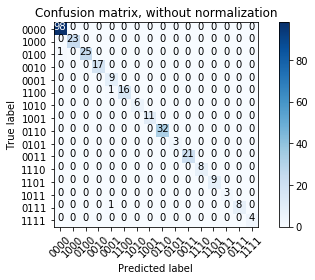

In [133]:
# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(confusion, classes=classes, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()